# 통계기반 시계열 분석 2
- 수업 내용: Time-series Regression, Binary Variable Model, Trigonometric Model, Growth Curve Model
- 실습 조교: 배진수(wlstn215@korea.ac.kr), 황순혁(shhwang1@korea.ac.kr), 김지현(jihyun_k@korea.ac.kr)

## 1. Binary Variable Models

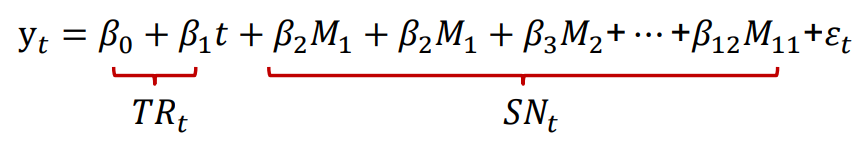

In [ ]:
# 코랩과 깃허브 연동하시는 분들 참고
# !git https://github.com/bogus215/LG-EDUCATION.git

# 이미지 안 보이시는 분들 참고 
# !pip install IPython ### 패키지 설치
# from IPython.display import Image
# Image('/content/LG-EDUCATION/image/3-1.PNG')

In [ ]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 데이터 읽어오기
hotel_data = pd.read_csv('./dataset/example-hotel-rooms.csv')

# 코랩과 깃허브 연동하시는 분들 참고
# hotel_data = pd.read_csv('/content/LG-EDUCATION/dataset/example-hotel-rooms.csv')

In [ ]:
# 데이터 잘 읽어왔는지 상단 10개 출력하기
hotel_data.head(10)

In [ ]:
# 데이터의 행과 컬럼 개수 확인하기
hotel_data.shape # (행 개수, 컬럼 개수)

In [ ]:
# 14년간 수집된 호텔 방 사용 개수 데이터
fig = plt.figure(figsize=(6,4))
plt.plot(hotel_data['y'], marker='o')
plt.title('Hotel rooms occupied for 14 years', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Occupied', fontsize=12)

plt.show()

In [ ]:
hotel_data['month'] = hotel_data['t'] % 12 # % 12; 12로 나누고 난 나머지의 값
hotel_data['month'].tail(20)

#### Binary Variable Models 모델링을 위해서는 아래와 같은 여러가지 Dummy, Binary Variable 생성이 필요함

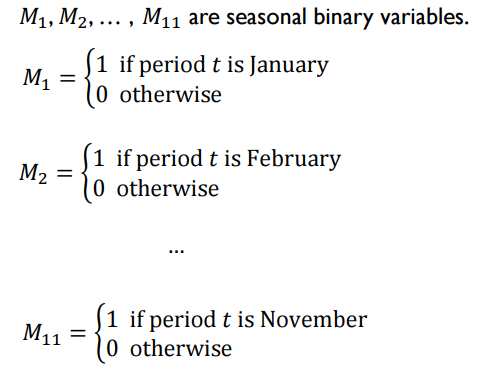

In [ ]:
# 이미지 안 보이시는 분들 참고 
# from IPython.display import Image
# Image('/content/LG-EDUCATION/image/3-2.PNG')

In [ ]:
# 더미 Variable 생성
## drop_first 옵션: 가장 마지막에 대한 이진 변수는 효율성을 제고하여 제거할 지 안 할지?
hotel_dummy = pd.get_dummies(hotel_data['month'], drop_first=True)
hotel_dummy.rename(columns = lambda x: "m" + str(x), inplace=True) # 변수 이름 변경
hotel_dummy

In [ ]:
binary_hotel_data = pd.concat([hotel_data, hotel_dummy], axis=1) # column-wise 데이터 병합
binary_hotel_data

In [ ]:
# 타겟(종속) 변수에 대한 로그 변환 수행 (Y의 분산이 점점 커지기 때문에)
binary_hotel_data['log_y'] = np.log(binary_hotel_data['y'])
binary_hotel_data

In [ ]:
# Binary Variable Models 학습 및 결과물 확인
binary_hotel_model = ols('log_y ~ t+m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11', data=binary_hotel_data).fit()
binary_hotel_model.summary()

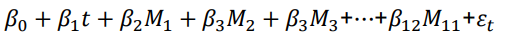

In [ ]:
# 이미지 안 보이시는 분들 참고 
# from IPython.display import Image
# Image('/content/LG-EDUCATION/image/3-3.PNG')

In [ ]:
y_169 = binary_hotel_model.params['Intercept'] + 169*binary_hotel_model.params['t'] + binary_hotel_model.params[f'm{169%12}']
pred_169 = np.exp(y_169)
print(f'[Binary variables] prediction of 169 months is {pred_169:.2f}')

In [ ]:
pred_columns = binary_hotel_data.drop(['y', 'month'], axis=1).columns # y와 month 변수를 제외한 나머지 모든 변수
pred_binary_hotel = binary_hotel_model.predict(binary_hotel_data[pred_columns])
pred_binary_hotel = np.exp(pred_binary_hotel)

# plotting predicion value and real value
fig = plt.figure(figsize=(12,8))
plt.scatter(binary_hotel_data['t'], binary_hotel_data['y'], color='royalblue', label='real')
plt.plot(binary_hotel_data['t'], pred_binary_hotel, color='darkorange' , label='pred')
plt.title('Prediction of "Binary varaible models" in hotel data', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Occupied Hotel rooms', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.legend()
plt.show()

## 2. Trigonometric Models

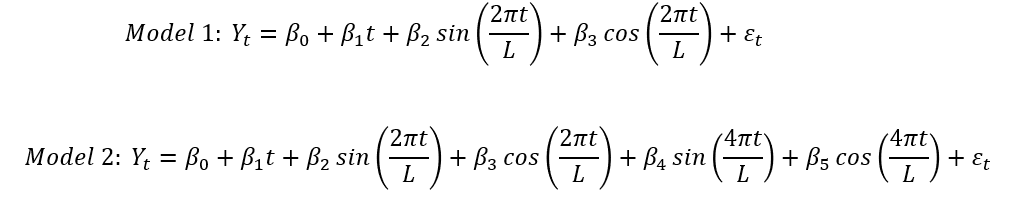

In [ ]:
# 이미지 안 보이시는 분들 참고 
# from IPython.display import Image
# Image('/content/LG-EDUCATION/image/3-4.PNG')

In [ ]:
# trigonometric model 모델 구축을 위한 변수 생성, if standard is month, time_stand=12, if standard is day, time_stand=365 
time_stand = 12
hotel_data['sintwo'] = np.sin(2*np.pi*hotel_data['t'] / time_stand)
hotel_data['costwo'] = np.cos(2*np.pi*hotel_data['t'] / time_stand)
hotel_data['sinfour'] = np.sin(4*np.pi*hotel_data['t'] / time_stand)
hotel_data['cosfour'] = np.cos(4*np.pi*hotel_data['t'] / time_stand)
hotel_data['log_y'] = np.log(hotel_data['y'])

hotel_data

In [ ]:
# 모델 1 구축 및 확인 (Y의 분산이 점점 커지기 때문에, Y의 경우 로그 변환 수행 후 학습)
tri_hotel_model_1 = ols('log_y ~ t+sintwo+costwo', data=hotel_data).fit()
tri_hotel_model_1.summary()

In [ ]:
# 예측 결과 vs 실제 결과 비교해보기

pred_columns_tri_1 = hotel_data.drop(['y', 'month'], axis=1).columns # y와 month 변수를 제외한 나머지 변수 모음
pred_tri_1_hotel = tri_hotel_model_1.predict(hotel_data[pred_columns_tri_1]) # 예측 수행, get y_hat
pred_tri_1_hotel = np.exp(pred_tri_1_hotel)

fig = plt.figure(figsize=(12,8))
plt.scatter(hotel_data['t'], hotel_data['y'], color='royalblue', label='true')
plt.plot(hotel_data['t'], pred_tri_1_hotel, color='darkorange', label='pred')
plt.title('Prediction of "Trigonometric models (1)" in hotel data', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Occupied Hotel rooms', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.legend()
plt.show()

In [ ]:
# 모델 2 구축 및 확인 (Y의 분산이 점점 커지기 때문에, Y의 경우 로그 변환 수행 후 학습)
tri_hotel_model_2 = ols('log_y ~ t+sintwo+costwo+sinfour+cosfour', data=hotel_data).fit()
tri_hotel_model_2.summary()

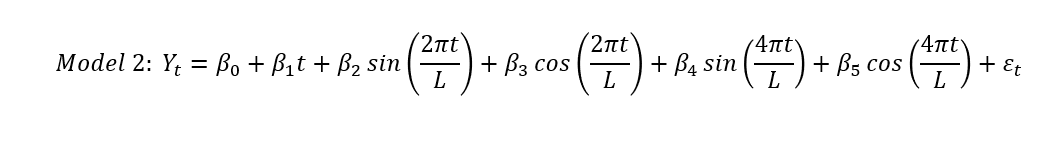

In [ ]:
# 이미지 안 보이시는 분들 참고 
# from IPython.display import Image
# Image('/content/LG-EDUCATION/image/3-5.PNG')

In [ ]:
# 직접 예측해보기 (one point)
y_add = np.pi*169 / time_stand
y_169_tri = tri_hotel_model_2.params['Intercept'] + 169*tri_hotel_model_2.params['t'] + np.sin(2*y_add)*tri_hotel_model_2.params['sintwo'] + np.cos(2*y_add)*tri_hotel_model_2.params['costwo'] + np.sin(4*y_add)*tri_hotel_model_2.params['sinfour'] +np.cos(4*y_add)*tri_hotel_model_2.params['cosfour']
pred_169_tri = np.exp(y_169_tri)
print(f'[Trigonometric] prediction of 169 months is {pred_169_tri:.2f}')

In [ ]:
# 패키지 이용하여 예측하기 (전체 데이터)
pred_columns_tri_2 = hotel_data.drop(['y', 'month'], axis=1).columns
pred_tri_2_hotel = tri_hotel_model_2.predict(hotel_data[pred_columns_tri_2])
pred_tri_2_hotel = np.exp(pred_tri_2_hotel)

# 예측 결과 시각화하기
fig = plt.figure(figsize=(12,8))
plt.scatter(hotel_data['t'], hotel_data['y'], color='royalblue', label='real')
plt.plot(hotel_data['t'], pred_tri_2_hotel, color='darkorange', label='pred')
plt.title('Prediction of "Trigonometric models (2)" in hotel data', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Occupied Hotel rooms', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.legend()
plt.show()

In [ ]:
# Binary Model, Trigonometric models (1), (2) 성능 비교하기
fig = plt.figure(figsize=(12,8))
plt.scatter(hotel_data['t'], hotel_data['y'], color='royalblue', label='real')
plt.plot(hotel_data['t'], pred_tri_1_hotel, color='crimson', label='Trigonometric models (1) Prediction')
plt.plot(hotel_data['t'], pred_tri_2_hotel, color='darkorange', label='Trigonometric models (2) Prediction')
plt.plot(binary_hotel_data['t'], pred_binary_hotel, color='g', label='Binary Model Predicction')
plt.title('Prediction of various models in hotel data', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Occupied Hotel rooms', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.legend()
plt.show()

In [ ]:
# 예측 성능 지표 산출 함수
def MAD(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def MSE(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

In [ ]:
# 모델별 예측 성능 지표 산출하기 MAD 기준
mad_bin = MAD(hotel_data['y'], pred_binary_hotel )
print(f'MAD of binary variables models = {mad_bin:.2f}')
mad_tri_1 = MAD(hotel_data['y'], pred_tri_1_hotel)
print(f'MAD of trigonometric models (1) = {mad_tri_1:.2f}')
mad_tri_2 = MAD(hotel_data['y'], pred_tri_2_hotel)
print(f'MAD of trigonometric models (2)  = {mad_tri_2:.2f}')

In [ ]:
# # 모델별 예측 성능 지표 산출하기 MSE 기준
mse_bin = MSE(hotel_data['y'], pred_binary_hotel )
print(f'MSE of binary variables models = {mse_bin:.2f}')
mse_tri_1 = MSE(hotel_data['y'], pred_tri_1_hotel)
print(f'MSE of trigonometric models (1) = {mse_tri_1:.2f}')
mse_tri_2 = MSE(hotel_data['y'], pred_tri_2_hotel)
print(f'MSE of trigonometric models (2)  = {mse_tri_2:.2f}')

## 3. Growth Curve Models

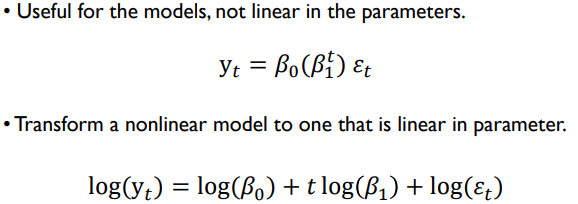

In [ ]:
# 이미지 안 보이시는 분들 참고 
# from IPython.display import Image
# Image('/content/LG-EDUCATION/image/3-6.PNG')

In [ ]:
# 데이터 읽어오기
steak_data = pd.read_csv('./dataset/example-steakhouses.csv')
steak_data.head(5)

# 코랩과 깃허브 연동하시는 분들 참고
# steak_data = pd.read_csv('/content/LG-EDUCATION/dataset/example-steakhouses.csv')

In [ ]:
# Y 로그 변환 
steak_data['log_y'] = np.log(steak_data['y'])
steak_data.head(5)

In [ ]:
# Growth Curve 모델 학습 및 확인
steak_model = ols('log_y ~ t', data=steak_data).fit()
steak_model.summary()

In [ ]:
# beta 값 이용하여 예측 결과 직접 구해보기 (데이터 1개)
log_y_16_pred = steak_model.params['Intercept'] + 16*steak_model.params['t']
print(f'prediction of log_y = {log_y_16_pred:.2f}')
pred_y_16 = np.exp(log_y_16_pred)
print(f'prediction of y = {pred_y_16:.2f}')

In [ ]:
# 패키지 함수 이용하여 예측 결과 구해보기 (데이터 전체)
pred_steak = steak_model.predict(steak_data['t'])
pred_steak = np.exp(pred_steak)

# plotting predicion value and real value
fig = plt.figure(figsize=(12,8))
plt.scatter(steak_data['t'], steak_data['y'], color='royalblue', label='real')
plt.plot(steak_data['t'], pred_steak, color='darkorange', label='pred')
plt.title('Prediction of "Growth Curve Models" in steak data', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Western staek house', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.legend()
plt.show()